# Neural network classifier demonstration

Last revised: 15-Oct-2019 by Christian Forssén [christian.forssen@chalmers.se]

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Not really needed, but nicer plots
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk")

## Developing a code for doing neural networks with back propagation

One can identify a set of key steps when using neural networks to solve supervised learning problems:  
  
1. Collect and pre-process data  
1. Define model and architecture  
1. Choose cost function and optimizer  
1. Train the model  
1. Evaluate model performance on test data  
1. Adjust hyperparameters (if necessary, network architecture)

### Introduction to tensorflow
This short introduction uses Keras to:
* Build a neural network that classifies images.
* Train this neural network.
* And, finally, evaluate the accuracy of the model.

See [https://www.tensorflow.org/tutorials/quickstart/beginner](https://www.tensorflow.org/tutorials/quickstart/beginner) for more details

See also the [Tensorflow classification tutorial](https://www.tensorflow.org/tutorials/keras/classification)

In [2]:
# Install TensorFlow by updating the conda environment

import tensorflow as tf
print(tf.__version__)

2.7.0


Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. 

### Explore the data

In [4]:
# The shape of the training data
x_train.shape

(60000, 28, 28)

In [5]:
# Each training label is an integer
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

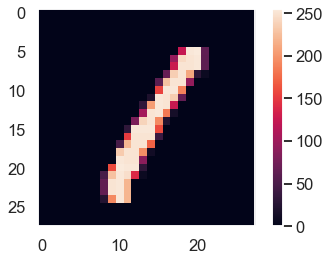

In [6]:
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()
plt.grid(False)

In [7]:
print(y_train[3])

1


In [8]:
np.min(x_train)

0

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

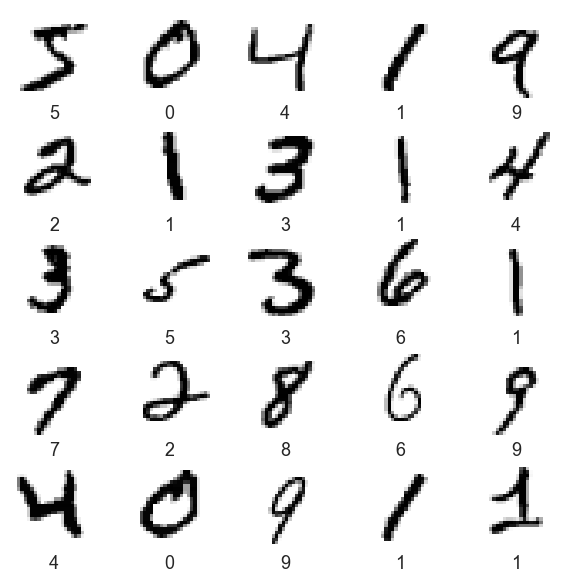

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))


### Build the network

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), have parameters that are learned during training.

Build the [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model by stacking layers. Choose an optimizer and loss function for training:

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

2021-12-01 12:07:20.435254: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The first layer in this network, [`tf.keras.layers.Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists two [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In between the Dense layers is a [`tf.keras.layers.Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layer. Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* *Loss function* — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* — This is how the model is updated based on the data it sees and its loss function.
* *Metrics* — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train and evaluate the model:

In [23]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0670 - accuracy: 0.9786
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0592 - accuracy: 0.9813
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0556 - accuracy: 0.9816
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0501 - accuracy: 0.9834
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0450 - accuracy: 0.9847: 0s - loss: 0.0443 - accura


### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [24]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0713 - accuracy: 0.9794 - 298ms/epoch - 951us/step

Test accuracy: 0.9793999791145325


### Make predictions
With the model trained, you can use it to make predictions about some images.

In [15]:
print(y_test[0])

7


In [16]:
predictions = model.predict(x_test)

# Let's look at the prediction for the first test image
predictions[0]

array([6.27677244e-09, 4.12590406e-09, 4.06771960e-06, 4.93377702e-05,
       1.49731793e-14, 1.62606320e-08, 2.93153603e-16, 9.99946475e-01,
       1.86099722e-08, 1.07753564e-07], dtype=float32)

In [17]:
# Check the normalization of the output probabilities
np.sum(predictions[0])

1.0

In [18]:
# Which prob is largest?
np.argmax(predictions[0])

7

In [19]:
# Examining the test label shows that this classification is correct:
y_test[0]

7

In [20]:
# Some helper functions for nice plotting
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(str(predicted_label),
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

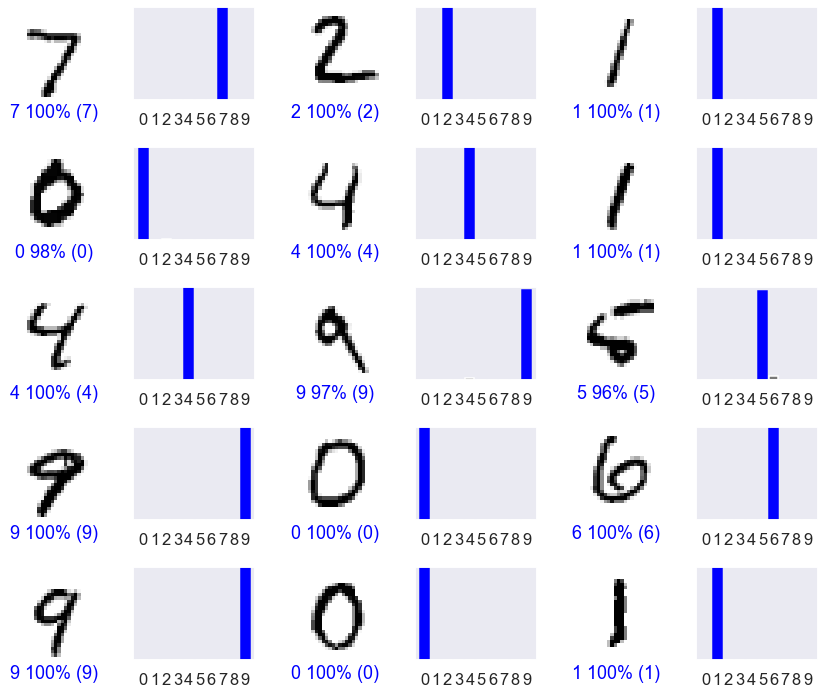

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()